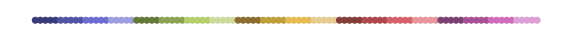

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

colormap = cm.get_cmap('tab20b')

x = np.linspace(0,1,100)
plt.figure(figsize=(10,.5))
plt.scatter(x, np.zeros(x.shape), c=colormap(x)); plt.axis('off');

dataset_colors = {
            "birth":colormap(0),
            "ring":colormap(0.61),
            "adult":colormap(0.41),
            "heart":colormap(0.21)}

In [2]:
def linear_regress(dataset, algo, target):
    metrics = pd.read_csv(f"../../{dataset}/metrics.csv").drop(["precision", "lr_acc", "auroc"], axis=1)
    X = metrics[metrics["algo"]==algo].drop(["algo", "no"], axis=1)
    cols = X.columns
    accs = pd.read_csv(f"../../{dataset}/accuracy_results.csv")
    accs = accs[accs["algo"] == algo]
    y = accs[target]
    
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    clf = LinearRegression()
    clf.fit(X,y)
    
    return {m:abs(coef) for m, coef in zip(cols, clf.coef_)}
    
linear_regress("birth_randoms", "mondrian","knn_pca_auroc")

{'entropy': 0.0013411143416452468,
 'cm': 0.018722610141335957,
 'dm': 0.008557512327219938,
 'discern': 0.002478198344882742,
 'ilm': 0.0004937114516337391,
 'hellinger': 0.0031885691612620944,
 'bivariate_corr': 0.0028080274452492514,
 'avg_eq_size': 0.0003724908241573956,
 'ambiguity': 0.00503369832697199,
 'granularity': 0.006995754094172267,
 'dse': 0.00125693656680496}

In [3]:
res = {}
for dataset in ["birth_randoms", "ring_randoms", "adult_randoms", "heart_randoms"]:
    for algo in ["datafly", "datafly_shuffled", "mondrian"]:
        for target in ["lr_acc", "lr_auroc", "rf_pca_acc", "rf_pca_auroc", "knn_pca_acc", "knn_pca_auroc"]:
            res[(dataset, algo, target)] = linear_regress(dataset, algo, target)    

In [8]:
df = pd.DataFrame.from_dict(res, orient="index")
df

entropy            cm  \
birth_randoms datafly  lr_acc         4.412597e-02  1.024989e-03   
                       lr_auroc       1.520216e-02  4.856661e-03   
                       rf_pca_acc     1.711240e-03  8.476736e-03   
                       rf_pca_auroc   5.502211e-02  1.478593e-02   
                       knn_pca_acc    8.439657e-02  1.487401e-02   
...                                            ...           ...   
heart_randoms mondrian lr_auroc       2.073962e-02  3.947709e-03   
                       rf_pca_acc     1.700294e-09  7.242196e-09   
                       rf_pca_auroc   8.150819e-04  5.662852e-03   
                       knn_pca_acc    1.192334e-03  1.403201e-03   
                       knn_pca_auroc  2.320862e-02  3.109677e-04   

                                                dm       discern  \
birth_randoms datafly  lr_acc         2.088821e-02  1.244956e-02   
                       lr_auroc       2.971014e-03  2.101278e-03   
                       rf_pca_acc     1.316813e-02  1.110392e-02   
                       rf_pca_auroc   3.173191e-02  6.256814e-04   
                       knn_pca_acc    5.030690e-02  1.757928e-02   
...                                            ...           ...   
heart_randoms mondrian lr_auroc       8.618875e-03  1.729027e-01   
                       rf_pca_acc     9.229522e-10  2.210951e-07   
                       rf_pca_auroc   4.740502e-03  2.537992e-02   
                       knn_pca_acc    3.052737e-04  1.811881e-01   
                       knn_pca_auroc  2.479977e-03  9.967333e-01   

                                               ilm     hellinger  \
birth_randoms datafly  lr_acc         3.247222e-02  8.847040e-03   
                       lr_auroc       5.463538e-02  5.291923e-04   
                       rf_pca_acc     3.552996e-02  3.274349e-03   
                       rf_pca_auroc   1.069405e-01  8.457886e-03   
                       knn_pca_acc    3.869871e-02  3.726869e-03   
...                                            ...           ...   
heart_randoms mondrian lr_auroc       1.244829e-03  1.645274e-03   
                       rf_pca_acc     3.075292e-09  3.777600e-10   
                       rf_pca_auroc   3.808421e-03  1.127208e-03   
                       knn_pca_acc    3.234864e-03  2.638990e-04   
                       knn_pca_auroc  1.862810e-02  4.689849e-04   

                                      bivariate_corr   avg_eq_size  \
birth_randoms datafly  lr_acc           4.610804e-03  2.610121e-03   
                       lr_auroc         6.053073e-03  1.331203e-02   
                       rf_pca_acc       2.334174e-03  6.371978e-03   
                       rf_pca_auroc     8.104078e-03  2.873064e-02   
                       knn_pca_acc      1.335610e-04  4.213300e-02   
...                                              ...           ...   
heart_randoms mondrian lr_auroc         5.249435e-03  1.854425e-01   
                       rf_pca_acc       6.710117e-09  2.174977e-07   
                       rf_pca_auroc     1.405144e-03  5.849293e-02   
                       knn_pca_acc      5.903071e-04  1.862813e-01   
                       knn_pca_auroc    1.658721e-03  1.012779e+00   

                                         ambiguity   granularity           dse  
birth_randoms datafly  lr_acc         1.199907e-02  9.804472e-02  1.024178e-02  
                       lr_auroc       3.538525e-02  5.591621e-02  7.972744e-03  
                       rf_pca_acc     2.092728e-04  4.450587e-02  6.620185e-04  
                       rf_pca_auroc   4.552322e-02  1.703940e-01  3.701618e-03  
                       knn_pca_acc    3.290896e-02  1.050003e-01  3.581366e-02  
...                                            ...           ...           ...  
heart_randoms mondrian lr_auroc       8.522610e-03  1.495044e-02  3.456301e-03  
                       rf_pca_acc     1.963495e-09  7.319425e-09  1.222435e-09  
                      

In [9]:
df.describe()

,entropy,cm,dm,discern,ilm,hellinger,bivariate_corr,avg_eq_size,ambiguity,granularity,dse
count,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01
mean,1.136659e+09,3.378824e+08,1.701824e+08,1.883328e+09,2.907343e+08,0.002729,9.506910e+08,6.417231e+08,1.030123e+09,5.238322e+08,1.334301e+09
std,6.565671e+09,1.951707e+09,9.830228e+08,1.087865e+10,1.679366e+09,0.003274,5.491467e+09,3.706779e+09,5.950287e+09,3.025807e+09,7.707311e+09
min,1.700294e-09,7.242196e-09,9.229522e-10,2.210951e-07,3.075292e-09,0.000000,6.710117e-09,2.174977e-07,1.963495e-09,7.319425e-09,1.222435e-09
25%,3.955444e-03,5.011203e-03,1.908865e-03,4.911249e-03,1.480374e-03,0.000448,1.560241e-03,3.811204e-03,3.797228e-03,4.287950e-03,1.256783e-03
50%,1.802874e-02,1.389346e-02,6.602219e-03,1.091539e-02,5.317303e-03,0.001577,2.674101e-03,1.717975e-02,1.285786e-02,1.505558e-02,4.160378e-03
75%,4.887301e-02,2.725168e-02,1.815228e-02,4.127475e-02,2.367695e-02,0.003476,6.380606e-03,4.532797e-02,3.501421e-02,6.237499e-02,8.534110e-03
max,4.528608e+10,1.346171e+10,6.780304e+09,7.503445e+10,1.158326e+10,0.014843,3.787686e+10,2.556715e+10,4.104153e+10,2.087021e+10,5.316043e+10


In [12]:
df = df.reset_index()
df = df.rename(columns={"level_0":"dataset", "level_1":"algo", "level_2":"util_measure"})
df

,index,dataset,algo,util_measure,entropy,cm,dm,discern,ilm,hellinger,bivariate_corr,avg_eq_size,ambiguity,granularity,dse
0,0,birth_randoms,datafly,lr_acc,4.412597e-02,1.024989e-03,2.088821e-02,1.244956e-02,3.247222e-02,8.847040e-03,4.610804e-03,2.610121e-03,1.199907e-02,9.804472e-02,1.024178e-02
1,1,birth_randoms,datafly,lr_auroc,1.520216e-02,4.856661e-03,2.971014e-03,2.101278e-03,5.463538e-02,5.291923e-04,6.053073e-03,1.331203e-02,3.538525e-02,5.591621e-02,7.972744e-03
2,2,birth_randoms,datafly,rf_pca_acc,1.711240e-03,8.476736e-03,1.316813e-02,1.110392e-02,3.552996e-02,3.274349e-03,2.334174e-03,6.371978e-03,2.092728e-04,4.450587e-02,6.620185e-04
3,3,birth_randoms,datafly,rf_pca_auroc,5.502211e-02,1.478593e-02,3.173191e-02,6.256814e-04,1.069405e-01,8.457886e-03,8.104078e-03,2.873064e-02,4.552322e-02,1.703940e-01,3.701618e-03
4,4,birth_randoms,datafly,knn_pca_acc,8.439657e-02,1.487401e-02,5.030690e-02,1.757928e-02,3.869871e-02,3.726869e-03,1.335610e-04,4.213300e-02,3.290896e-02,1.050003e-01,3.581366e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,heart_randoms,mondrian,lr_auroc,2.073962e-02,3.947709e-03,8.618875e-03,1.729027e-01,1.244829e-03,1.645274e-03,5.249435e-03,1.854425e-01,8.522610e-03,1.495044e-02,3.456301e-03
68,68,heart_randoms,mondrian,rf_pca_acc,1.700294e-09,7.242196e-09,9.229522e-10,2.210951e-07,3.075292e-09,3.777600e-10,6.710117e-09,2.174977e-07,1.963495e-09,7.319425e-09,1.222435e-09
69,69,heart_randoms,mondrian,rf_pca_auroc,8.150819e-04,5.662852e-03,4.740502e-03,2.537992e-02,3.808421e-03,1.127208e-03,1.405144e-03,5.849293e-02,4.033282e-02,2.477947e-03,1.910912e-03
70,70,heart_randoms,mondrian,knn_pca_acc,1.192334e-03,1.403201e-03,3.052737e-04,1.811881e-01,3.234864e-03,2.638990e-04,5.903071e-04,1.862813e-01,4.426077e-03,4.382559e-03,8.060935e-04


In [31]:
df.sort_values(by="entropy", ascending=False)
df = df.drop([57,63,62,56])

{'entropy': 0.02580135645966263, 'cm': 0.018217787982466822, 'dm': 0.009869146181665088, 'discern': 0.06434853547598343, 'ilm': 0.05884246258815033, 'hellinger': 0.0028898060391078294, 'bivariate_corr': 0.004518089252171711, 'avg_eq_size': 0.07819059430774847, 'ambiguity': 0.028614893912133448, 'granularity': 0.07455578662815066, 'dse': 0.005436312190770838}
{'entropy': 0.006948512735571962, 'cm': 0.0047275453150429836, 'dm': 0.0025969598649600947, 'discern': 0.03943908944016951, 'ilm': 0.050268784084921685, 'hellinger': 0.000798811238862522, 'bivariate_corr': 0.0012282538342511071, 'avg_eq_size': 0.04885927969155261, 'ambiguity': 0.01424336764968605, 'granularity': 0.04998116965189706, 'dse': 0.001431001706346733}


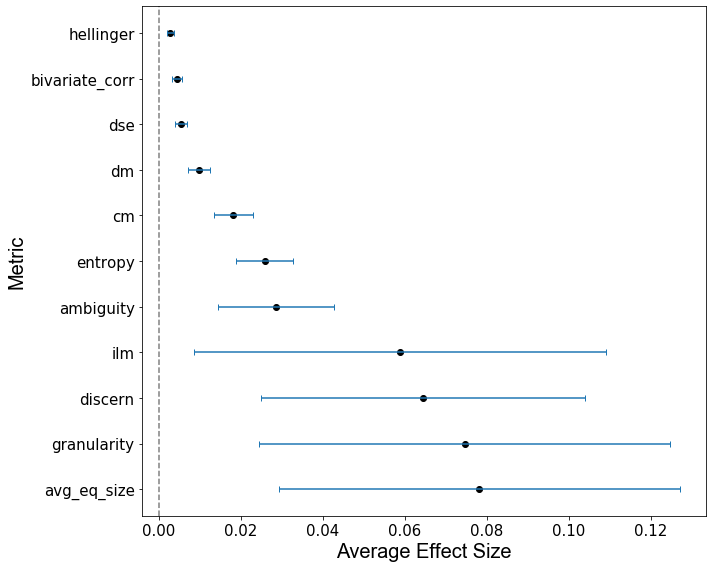

In [77]:
from scipy.stats import sem,t

def conf_interval(metric):
    confidence = 0.95
    data = df[metric]
    
    n = len(data)
    m = np.mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return h



m_avg = {m:np.mean(df[m]) for m in df.columns[4:]}
print(m_avg)

errs = {m:conf_interval(m) for m in m_avg.keys()}
print(errs)

s = {k: v for k, v in sorted(m_avg.items(), key=lambda item: item[1], reverse=True)}
s


plt.figure(figsize=(10,8))
plt.errorbar([m_avg[k] for k in s.keys()], 
             s.keys() ,
             xerr=[errs[k] for k in s.keys()], 
             capsize=3,ls="none")
plt.scatter(m_avg.values(), m_avg.keys(), color="black")
plt.axvline(x=0, linestyle="--", alpha=0.5, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Average Effect Size", fontsize=20, fontname="Arial")
plt.ylabel("Metric", fontsize=20, fontname="Arial")
plt.tight_layout()
plt.savefig("linreg_conf_interval.png")

In [39]:
dataset_counts = {}
for ds in ["birth", "ring", "adult","heart"]:
    win_count = {c:0 for c in df.columns[4:]}
    df_ds = df[df["level_0"] == f"{ds}_randoms"]


    for i in range(len(df_ds)):
        max_val =0
        max_met = ""

        for c in df_ds.columns[4:]:
            print(c)
            if df_ds.iloc[i][c] > max_val:
                max_val = df_ds.iloc[i][c]
                max_met = c
        win_count[max_met] += 1
        
    dataset_counts[ds] = win_count
dataset_counts

cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger
bivariate_corr
avg_eq_size
ambiguity
granularity
dse
cm
dm
discern
ilm
hellinger


{'birth': {'cm': 5,
  'dm': 0,
  'discern': 0,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'avg_eq_size': 0,
  'ambiguity': 2,
  'granularity': 11,
  'dse': 0},
 'ring': {'cm': 1,
  'dm': 0,
  'discern': 0,
  'ilm': 4,
  'hellinger': 0,
  'bivariate_corr': 0,
  'avg_eq_size': 7,
  'ambiguity': 0,
  'granularity': 6,
  'dse': 0},
 'adult': {'cm': 2,
  'dm': 1,
  'discern': 3,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'avg_eq_size': 4,
  'ambiguity': 2,
  'granularity': 6,
  'dse': 0},
 'heart': {'cm': 0,
  'dm': 0,
  'discern': 11,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'avg_eq_size': 7,
  'ambiguity': 0,
  'granularity': 0,
  'dse': 0}}

In [40]:
win_counts = []
for ds in dataset_counts:
    win_count = {k: v for k, v in sorted(dataset_counts[ds].items(), key=lambda item: item[1], reverse=True)}
    win_counts.append(win_count)
    
win_counts


[{'granularity': 11,
  'cm': 5,
  'ambiguity': 2,
  'dm': 0,
  'discern': 0,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'avg_eq_size': 0,
  'dse': 0},
 {'avg_eq_size': 7,
  'granularity': 6,
  'ilm': 4,
  'cm': 1,
  'dm': 0,
  'discern': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'ambiguity': 0,
  'dse': 0},
 {'granularity': 6,
  'avg_eq_size': 4,
  'discern': 3,
  'cm': 2,
  'ambiguity': 2,
  'dm': 1,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'dse': 0},
 {'discern': 11,
  'avg_eq_size': 7,
  'cm': 0,
  'dm': 0,
  'ilm': 0,
  'hellinger': 0,
  'bivariate_corr': 0,
  'ambiguity': 0,
  'granularity': 0,
  'dse': 0}]

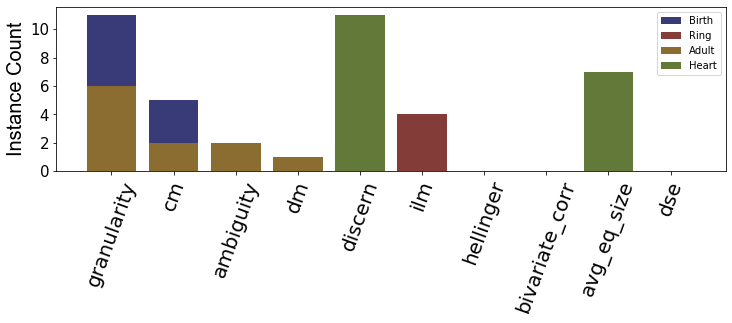

In [41]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Instance Count", fontsize=20, fontname='Arial')
ps = []
for wc,c in zip(win_counts, [colormap(0),colormap(0.61),colormap(0.41),colormap(0.21)]):
    p = plt.bar(wc.keys(), wc.values(), label=wc.keys(), color=c)
    ps.append(p)
    
plt.legend((ps[0][0],ps[1][0], ps[2][0], ps[3][0]), ('Birth', 'Ring', "Adult", "Heart"))

plt.legend
plt.gcf().subplots_adjust(bottom=0.5)

plt.savefig("linear_regression_highest_counts.png")

In [44]:
mets = df.drop(["level_0", "level_1", "level_2"], axis=1)
mets

,entropy,cm,dm,discern,ilm,hellinger,bivariate_corr,avg_eq_size,ambiguity,granularity,dse
0,4.412597e-02,1.024989e-03,2.088821e-02,1.244956e-02,3.247222e-02,8.847040e-03,4.610804e-03,2.610121e-03,1.199907e-02,9.804472e-02,1.024178e-02
1,1.520216e-02,4.856661e-03,2.971014e-03,2.101278e-03,5.463538e-02,5.291923e-04,6.053073e-03,1.331203e-02,3.538525e-02,5.591621e-02,7.972744e-03
2,1.711240e-03,8.476736e-03,1.316813e-02,1.110392e-02,3.552996e-02,3.274349e-03,2.334174e-03,6.371978e-03,2.092728e-04,4.450587e-02,6.620185e-04
3,5.502211e-02,1.478593e-02,3.173191e-02,6.256814e-04,1.069405e-01,8.457886e-03,8.104078e-03,2.873064e-02,4.552322e-02,1.703940e-01,3.701618e-03
4,8.439657e-02,1.487401e-02,5.030690e-02,1.757928e-02,3.869871e-02,3.726869e-03,1.335610e-04,4.213300e-02,3.290896e-02,1.050003e-01,3.581366e-02
...,...,...,...,...,...,...,...,...,...,...,...
67,2.073962e-02,3.947709e-03,8.618875e-03,1.729027e-01,1.244829e-03,1.645274e-03,5.249435e-03,1.854425e-01,8.522610e-03,1.495044e-02,3.456301e-03
68,1.700294e-09,7.242196e-09,9.229522e-10,2.210951e-07,3.075292e-09,3.777600e-10,6.710117e-09,2.174977e-07,1.963495e-09,7.319425e-09,1.222435e-09
69,8.150819e-04,5.662852e-03,4.740502e-03,2.537992e-02,3.808421e-03,1.127208e-03,1.405144e-03,5.849293e-02,4.033282e-02,2.477947e-03,1.910912e-03
70,1.192334e-03,1.403201e-03,3.052737e-04,1.811881e-01,3.234864e-03,2.638990e-04,5.903071e-04,1.862813e-01,4.426077e-03,4.382559e-03,8.060935e-04


In [59]:
mets.sort_values("entropy", ascending=False)
mets = mets.drop([57,63,62,56], axis=0)

In [71]:
means = mets.describe()
means

,entropy,cm,dm,discern,ilm,hellinger,bivariate_corr,avg_eq_size,ambiguity,granularity,dse
count,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01
mean,2.580136e-02,1.821779e-02,9.869146e-03,6.434854e-02,5.884246e-02,0.002890,4.518089e-03,7.819059e-02,2.861489e-02,7.455579e-02,5.436312e-03
std,2.870675e-02,1.953115e-02,1.072895e-02,1.629367e-01,2.076780e-01,0.003300,5.074348e-03,2.018548e-01,5.884435e-02,2.064898e-01,5.911970e-03
min,1.700294e-09,7.242196e-09,9.229522e-10,2.210951e-07,3.075292e-09,0.000000,6.710117e-09,2.174977e-07,1.963495e-09,7.319425e-09,1.222435e-09
25%,3.201202e-03,4.715807e-03,1.458474e-03,4.679506e-03,1.478756e-03,0.000518,1.521026e-03,3.464242e-03,3.247938e-03,3.773106e-03,1.223327e-03
50%,1.534725e-02,1.144804e-02,4.918847e-03,1.047162e-02,4.768983e-03,0.001786,2.487222e-03,1.435625e-02,1.165727e-02,1.452695e-02,3.815231e-03
75%,4.199451e-02,2.391815e-02,1.642970e-02,3.823666e-02,1.721369e-02,0.003743,5.638474e-03,4.078718e-02,3.309937e-02,5.080021e-02,7.765121e-03
max,1.230995e-01,8.035330e-02,5.030690e-02,9.967333e-01,1.246219e+00,0.014843,2.475417e-02,1.033176e+00,3.826852e-01,1.254477e+00,3.581366e-02


In [ ]:
m

In [60]:


for r in range(len(mets)):
    #print(mets.iloc[r])
    row = mets.iloc[r]
    s_row = row.sort_values(ascending=False)
    print(s_row)
    

granularity       0.098045
entropy           0.044126
ilm               0.032472
dm                0.020888
discern           0.012450
ambiguity         0.011999
dse               0.010242
hellinger         0.008847
bivariate_corr    0.004611
avg_eq_size       0.002610
cm                0.001025
Name: 0, dtype: float64
granularity       0.055916
ilm               0.054635
ambiguity         0.035385
entropy           0.015202
avg_eq_size       0.013312
dse               0.007973
bivariate_corr    0.006053
cm                0.004857
dm                0.002971
discern           0.002101
hellinger         0.000529
Name: 1, dtype: float64
granularity       0.044506
ilm               0.035530
dm                0.013168
discern           0.011104
cm                0.008477
avg_eq_size       0.006372
hellinger         0.003274
bivariate_corr    0.002334
entropy           0.001711
dse               0.000662
ambiguity         0.000209
Name: 2, dtype: float64
granularity       0.170394
ilm       